In [61]:
import simpy
import random
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict

In [62]:
def request_generator(env, arrival_rate, server):
    """Generates requests according to a Poisson process."""
    request_id = 0
    while True:
        yield env.timeout(0.25)#(random.expovariate(arrival_rate))  # Time between arrivals
        request_id += 1
        env.process(handle_request(env, server, request_id))
        queue_sizes.append((env.now, len(server.queue)))

def handle_request(env, server, request_id):
    """Handles a single request in a batch processing system.
    The server processes up to 4 requests concurrently, with processing time
    increasing linearly with the number of concurrent requests."""
    arrival_time = env.now

    with server.request() as request:
        yield request  # Wait for server availability

        # Assign the request to the least-loaded available node
        available_node = min(node_loads, key=node_loads.get, default=1)
        node_loads[available_node] += 1

        # Count current concurrent requests (including this one)
        concurrent_requests = len(server.users)

        # Calculate processing time - increases linearly with concurrent requests
        base_processing_time = random.uniform(1, 5)
        processing_time = 1#base_processing_time * concurrent_requests

        start_time = env.now
        yield env.timeout(processing_time)
        print(f'request processed')
        end_time = env.now

        # Update node load after processing
        node_loads[available_node] -= 1

        request_timeline.append({
            'Request': request_id,
            'Start': start_time,
            'End': end_time,
            'Wait': start_time - arrival_time,
            'Processing': processing_time,
            'BatchSize': concurrent_requests,
            'Node': available_node
        })

def plot_metrics():
    # Plot queue size over time
    queue_df = pd.DataFrame(queue_sizes, columns=['Time', 'Queue Size'])
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=queue_df, x='Time', y='Queue Size')
    plt.title('Queue Size Over Time')
    plt.show()

    # Plot Gantt chart
    timeline_df = pd.DataFrame(request_timeline)
    timeline_df.to_csv('requests.csv')
    plt.figure(figsize=(12, 6))

    # Plot waiting time bars (red)
    for _, row in timeline_df.iterrows():
        plt.barh(y=f"Request {row['Request']} (Node {row['Node']})", 
                width=row['Wait'],
                left=row['Start']-row['Wait'],
                color='red')

    # Plot processing time bars (green)        
    for _, row in timeline_df.iterrows():
        plt.barh(y=f"Request {row['Request']} (Node {row['Node']})",
                width=row['Processing'], 
                left=row['Start'],
                color='green')

    # Annotate batch size on the Gantt chart
    for _, row in timeline_df.iterrows():
        plt.text(x=row['End'] + 0.1, 
                 y=f"Request {row['Request']} (Node {row['Node']})", 
                 s=f"Batch: {row['BatchSize']}", 
                 va='center', 
                 fontsize=8, 
                 color='blue')

    plt.title('Request Timeline (Gantt Chart)')
    plt.xlabel('Time')
    plt.ylabel('Request ID (Node)')
    plt.show()

In [63]:
# Global data structures to store metrics
queue_sizes = []
request_timeline = []
node_loads = defaultdict(int)  # Track loads on each node

NODE_COUNT = 2  # Number of nodes (servers)

In [64]:
# Parameters
arrival_rate = 2  # Average number of requests per second

# Clear previous data
queue_sizes.clear()
request_timeline.clear()
node_loads.clear()
for node in range(1, NODE_COUNT + 1):
    node_loads[node] = 0

# Environment and resources
env = simpy.Environment()
server = simpy.Resource(env, capacity=NODE_COUNT)

# Start the request generator
env.process(request_generator(env, arrival_rate, server))

# Run the simulation for a specified time (e.g., 30 seconds)
simulation_time = 30.5
env.run(until=simulation_time)

request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request processed
request pr

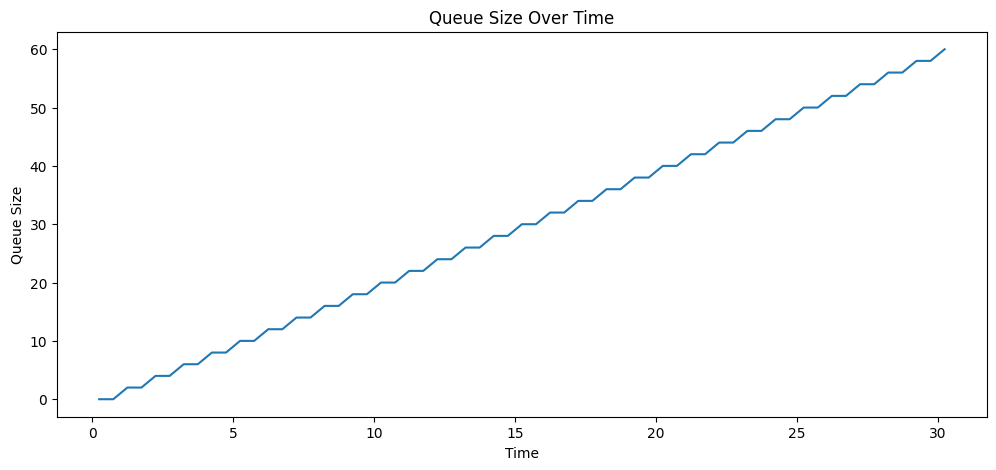

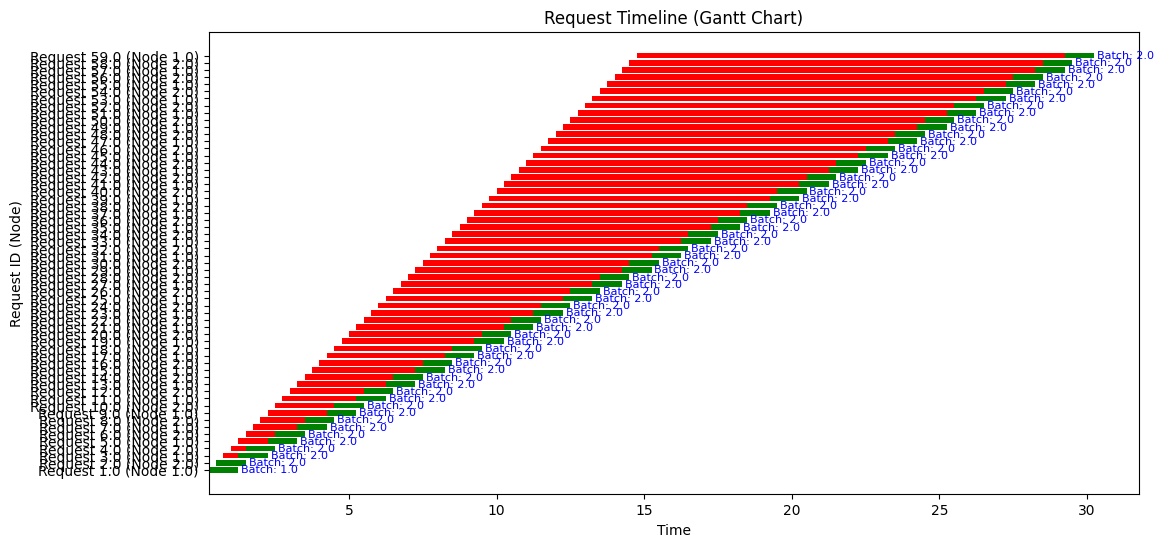

In [65]:
plot_metrics()

In [66]:
request_timeline

[{'Request': 1,
  'Start': 0.25,
  'End': 1.25,
  'Wait': 0.0,
  'Processing': 1,
  'BatchSize': 1,
  'Node': 1},
 {'Request': 2,
  'Start': 0.5,
  'End': 1.5,
  'Wait': 0.0,
  'Processing': 1,
  'BatchSize': 2,
  'Node': 2},
 {'Request': 3,
  'Start': 1.25,
  'End': 2.25,
  'Wait': 0.5,
  'Processing': 1,
  'BatchSize': 2,
  'Node': 1},
 {'Request': 4,
  'Start': 1.5,
  'End': 2.5,
  'Wait': 0.5,
  'Processing': 1,
  'BatchSize': 2,
  'Node': 2},
 {'Request': 5,
  'Start': 2.25,
  'End': 3.25,
  'Wait': 1.0,
  'Processing': 1,
  'BatchSize': 2,
  'Node': 1},
 {'Request': 6,
  'Start': 2.5,
  'End': 3.5,
  'Wait': 1.0,
  'Processing': 1,
  'BatchSize': 2,
  'Node': 2},
 {'Request': 7,
  'Start': 3.25,
  'End': 4.25,
  'Wait': 1.5,
  'Processing': 1,
  'BatchSize': 2,
  'Node': 1},
 {'Request': 8,
  'Start': 3.5,
  'End': 4.5,
  'Wait': 1.5,
  'Processing': 1,
  'BatchSize': 2,
  'Node': 2},
 {'Request': 9,
  'Start': 4.25,
  'End': 5.25,
  'Wait': 2.0,
  'Processing': 1,
  'BatchSize':